In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
df = pd.read_csv('speeddating.csv')
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [43]:
df = df[['gender','d_age','samerace','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','match','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
df

,gender,d_age,samerace,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,...,shared_interests_partner,met,match,guess_prob_liked,sports,exercise,dining,art,hiking,gaming
0,b'female',6.0,b'0',6.0,8.0,8.0,8.0,7.0,6.0,9.0,...,5.0,0.0,b'0',6.0,9.0,8.0,9.0,1.0,5.0,1.0
1,b'female',1.0,b'0',6.0,8.0,8.0,8.0,7.0,7.0,8.0,...,6.0,1.0,b'0',5.0,9.0,8.0,9.0,1.0,5.0,1.0
2,b'female',1.0,b'1',6.0,8.0,8.0,8.0,7.0,5.0,8.0,...,7.0,1.0,b'1',NaN,9.0,8.0,9.0,1.0,5.0,1.0
3,b'female',2.0,b'0',6.0,8.0,8.0,8.0,7.0,7.0,6.0,...,8.0,0.0,b'1',6.0,9.0,8.0,9.0,1.0,5.0,1.0
4,b'female',3.0,b'0',6.0,8.0,8.0,8.0,7.0,5.0,6.0,...,6.0,0.0,b'1',6.0,9.0,8.0,9.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'male',1.0,b'0',8.0,7.0,6.0,7.0,7.0,3.0,5.0,...,NaN,0.0,b'0',5.0,8.0,5.0,10.0,10.0,7.0,1.0
8374,b'male',1.0,b'0',8.0,7.0,6.0,7.0,7.0,4.0,6.0,...,NaN,0.0,b'0',4.0,8.0,5.0,10.0,10.0,7.0,1.0
8375,b'male',4.0,b'0',8.0,7.0,6.0,7.0,7.0,4.0,7.0,...,NaN,0.0,b'0',5.0,8.0,5.0,10.0,10.0,7.0,1.0
8376,b'male',3.0,b'0',8.0,7.0,6.0,7.0,7.0,4.0,6.0,...,5.0,0.0,b'0',5.0,8.0,5.0,10.0,10.0,7.0,1.0


In [44]:
print(df.isnull().sum())

gender                         0
d_age                          0
samerace                       0
attractive                   105
sincere                      105
intelligence                 105
funny                        105
ambition                     105
attractive_partner           202
sincere_partner              277
intelligence_partner         296
funny_partner                350
ambition_partner             712
shared_interests_partner    1067
met                          375
match                          0
guess_prob_liked             309
sports                        79
exercise                      79
dining                        79
art                           79
hiking                        79
gaming                        79
dtype: int64


In [45]:
df = df.dropna()

In [46]:
def match(n):
    if n == "b'0'":
        return 'No'
    else: 
        return 'Yes'

df['match'] = df['match'].apply(match)
df

C:\Users\napan\AppData\Local\Temp\ipykernel_12860\2576611299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match'] = df['match'].apply(match)


,gender,d_age,samerace,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,...,shared_interests_partner,met,match,guess_prob_liked,sports,exercise,dining,art,hiking,gaming
0,b'female',6.0,b'0',6.0,8.0,8.0,8.0,7.0,6.0,9.0,...,5.0,0.0,No,6.0,9.0,8.0,9.0,1.0,5.0,1.0
1,b'female',1.0,b'0',6.0,8.0,8.0,8.0,7.0,7.0,8.0,...,6.0,1.0,No,5.0,9.0,8.0,9.0,1.0,5.0,1.0
3,b'female',2.0,b'0',6.0,8.0,8.0,8.0,7.0,7.0,6.0,...,8.0,0.0,Yes,6.0,9.0,8.0,9.0,1.0,5.0,1.0
4,b'female',3.0,b'0',6.0,8.0,8.0,8.0,7.0,5.0,6.0,...,6.0,0.0,Yes,6.0,9.0,8.0,9.0,1.0,5.0,1.0
5,b'female',4.0,b'0',6.0,8.0,8.0,8.0,7.0,4.0,9.0,...,4.0,0.0,No,5.0,9.0,8.0,9.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,b'male',3.0,b'0',8.0,7.0,6.0,7.0,7.0,2.0,7.0,...,7.0,0.0,No,5.0,8.0,5.0,10.0,10.0,7.0,1.0
8368,b'male',1.0,b'1',8.0,7.0,6.0,7.0,7.0,3.0,4.0,...,4.0,0.0,No,5.0,8.0,5.0,10.0,10.0,7.0,1.0
8369,b'male',3.0,b'1',8.0,7.0,6.0,7.0,7.0,3.0,3.0,...,6.0,0.0,No,3.0,8.0,5.0,10.0,10.0,7.0,1.0
8370,b'male',2.0,b'0',8.0,7.0,6.0,7.0,7.0,2.0,7.0,...,8.0,0.0,No,6.0,8.0,5.0,10.0,10.0,7.0,1.0


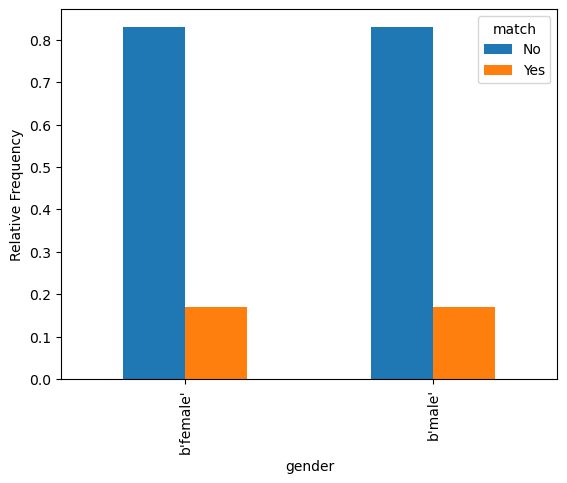

In [24]:
temp = pd.crosstab(df['gender'], df['match'], normalize='index')
temp.plot.bar()
plt.ylabel('Relative Frequency')
plt.show()

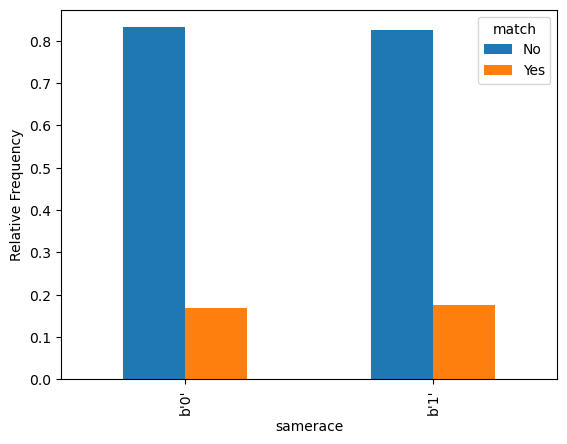

In [25]:
temp = pd.crosstab(df['samerace'], df['match'], normalize='index')
temp.plot.bar()
plt.ylabel('Relative Frequency')
plt.show()

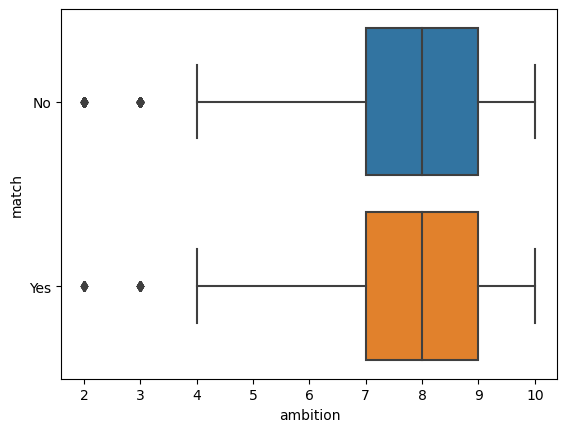

In [26]:
sns.boxplot(x='ambition', y='match', data=df)
plt.show()

In [47]:
df[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']].corr()

,d_age,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,guess_prob_liked,sports,exercise,dining,art,hiking,gaming
d_age,1.000000,-0.008730,-0.046027,0.003953,-0.062153,-0.027077,0.013660,0.005433,-0.017704,-0.011048,-0.004620,0.002566,-0.027676,-0.064266,-0.060748,-0.039265,0.050108,0.016947,-0.083063
attractive,-0.008730,1.000000,0.146754,0.440267,0.382689,0.313433,-0.012953,0.085137,0.110425,0.047749,0.114294,0.067615,0.260759,0.160427,0.249093,0.167210,0.090764,0.075170,0.013241
sincere,-0.046027,0.146754,1.000000,0.199547,0.229771,0.174039,0.050216,0.121334,0.123732,0.072040,0.125690,0.050278,0.076977,0.053425,0.028919,0.108842,0.093279,0.111177,0.041127
intelligence,0.003953,0.440267,0.199547,1.000000,0.273646,0.350454,0.064434,0.136605,0.156206,0.133865,0.166940,0.117381,0.229632,0.147694,0.109044,0.280104,0.142444,0.010615,0.094630
funny,-0.062153,0.382689,0.229771,0.273646,1.000000,0.343757,0.071904,0.105841,0.125117,0.058440,0.090456,0.057176,0.082585,0.141796,0.111536,0.146230,0.021457,0.004810,0.075045
ambition,-0.027077,0.313433,0.174039,0.350454,0.343757,1.000000,-0.010197,0.072791,0.094714,0.057933,0.115268,0.058051,0.069387,0.158667,0.157118,0.195780,0.091001,0.043709,0.121699
attractive_partner,0.013660,-0.012953,0.050216,0.064434,0.071904,-0.010197,1.000000,0.401683,0.382461,0.588945,0.349580,0.485520,0.282060,0.006949,-0.036434,-0.004888,0.031394,0.029196,0.073751
sincere_partner,0.005433,0.085137,0.121334,0.136605,0.105841,0.072791,0.401683,1.000000,0.666730,0.505189,0.464143,0.397923,0.338537,0.043715,0.020597,0.054025,0.086645,-0.025190,0.018146
intelligence_partner,-0.017704,0.110425,0.123732,0.156206,0.125117,0.094714,0.382461,0.666730,1.000000,0.497595,0.629143,0.402651,0.283817,0.033928,0.056385,0.072641,0.098375,0.021275,-0.016115
funny_partner,-0.011048,0.047749,0.072040,0.133865,0.058440,0.057933,0.588945,0.505189,0.497595,1.000000,0.490109,0.614409,0.392660,0.050358,0.014038,0.055067,0.073590,-0.001384,0.063712


In [ ]:
df['y'] = df['match'].replace({'Yes':1, 'No':0})

C:\Users\napan\AppData\Local\Temp\ipykernel_12860\524254343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['match'].replace({'Yes':1, 'No':0})


,gender,d_age,samerace,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,...,met,match,guess_prob_liked,sports,exercise,dining,art,hiking,gaming,y
0,b'female',6.0,b'0',6.0,8.0,8.0,8.0,7.0,6.0,9.0,...,0.0,No,6.0,9.0,8.0,9.0,1.0,5.0,1.0,0
1,b'female',1.0,b'0',6.0,8.0,8.0,8.0,7.0,7.0,8.0,...,1.0,No,5.0,9.0,8.0,9.0,1.0,5.0,1.0,0
3,b'female',2.0,b'0',6.0,8.0,8.0,8.0,7.0,7.0,6.0,...,0.0,Yes,6.0,9.0,8.0,9.0,1.0,5.0,1.0,1
4,b'female',3.0,b'0',6.0,8.0,8.0,8.0,7.0,5.0,6.0,...,0.0,Yes,6.0,9.0,8.0,9.0,1.0,5.0,1.0,1
5,b'female',4.0,b'0',6.0,8.0,8.0,8.0,7.0,4.0,9.0,...,0.0,No,5.0,9.0,8.0,9.0,1.0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,b'male',3.0,b'0',8.0,7.0,6.0,7.0,7.0,2.0,7.0,...,0.0,No,5.0,8.0,5.0,10.0,10.0,7.0,1.0,0
8368,b'male',1.0,b'1',8.0,7.0,6.0,7.0,7.0,3.0,4.0,...,0.0,No,5.0,8.0,5.0,10.0,10.0,7.0,1.0,0
8369,b'male',3.0,b'1',8.0,7.0,6.0,7.0,7.0,3.0,3.0,...,0.0,No,3.0,8.0,5.0,10.0,10.0,7.0,1.0,0
8370,b'male',2.0,b'0',8.0,7.0,6.0,7.0,7.0,2.0,7.0,...,0.0,No,6.0,8.0,5.0,10.0,10.0,7.0,1.0,0


In [49]:
X = df.drop(['match','y'], axis=1)
y = df['y']

In [50]:
scaler_training = StandardScaler()
scaled_exp_vars = scaler_training.fit_transform(X[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']])
X[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']] = scaled_exp_vars

In [51]:
X = pd.get_dummies(X, drop_first = True, dtype = int)
X.head()

,d_age,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,...,met,guess_prob_liked,sports,exercise,dining,art,hiking,gaming,gender_b'male',samerace_b'1'
0,0.519014,-0.796469,-0.21461,0.170353,-0.40514,-0.346426,-0.097422,1.055097,-0.230293,0.311659,...,0.0,0.346781,0.992585,0.729097,0.683712,-2.54246,-0.251306,-1.112997,0,0
1,-0.727605,-0.796469,-0.21461,0.170353,-0.40514,-0.346426,0.416881,0.480830,-0.230293,0.824528,...,1.0,-0.120802,0.992585,0.729097,0.683712,-2.54246,-0.251306,-1.112997,0,0
3,-0.478281,-0.796469,-0.21461,0.170353,-0.40514,-0.346426,0.416881,-0.667703,0.414432,0.311659,...,0.0,0.346781,0.992585,0.729097,0.683712,-2.54246,-0.251306,-1.112997,0,0
4,-0.228957,-0.796469,-0.21461,0.170353,-0.40514,-0.346426,-0.611725,-0.667703,-0.230293,0.311659,...,0.0,0.346781,0.992585,0.729097,0.683712,-2.54246,-0.251306,-1.112997,0,0
5,0.020367,-0.796469,-0.21461,0.170353,-0.40514,-0.346426,-1.126028,1.055097,-0.230293,-1.226946,...,0.0,-0.120802,0.992585,0.729097,0.683712,-2.54246,-0.251306,-1.112997,0,0


In [52]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=100) 
cross_val

KFold(n_splits=5, random_state=100, shuffle=True)

In [53]:
# Current model:

current_mod = LogisticRegression(penalty = 'none',solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X,y)
scores = cross_val_score(current_mod, X, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7755410967339642


In [55]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7755410967339642


In [56]:
# Test models:

X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7760386986881813


In [57]:
# Test models:

X1 = X[["gender_b'male'","samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7741576457123956


In [58]:
# Test models:

X1 = X[["gender_b'male'",'d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7761361459144747


In [59]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7756711131076567


In [60]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.775201647596675


In [61]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.776205246164859


In [62]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7763455474231321


In [63]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7757020237362966


In [64]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7652185116200553


In [65]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.775899543836106


In [66]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7748165561005372


In [67]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7691286666258783


In [68]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7733985779058808


In [69]:
#ambition partner +1
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.771439840752865


In [70]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7743323202216622


In [71]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7602097444210008


In [72]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.775932827090269


In [73]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7758722548993303


In [74]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7758655640296068


In [75]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7750157137832769


In [76]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7755375476103115


In [77]:
# Test models:

X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7756082929244755


In [78]:
# Best current
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1,y)
scores = cross_val_score(current_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7763455474231321


In [79]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7768002407099236


In [80]:
X1 = X[["gender_b'male'","samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7749104738954816


In [81]:
X1 = X[["gender_b'male'",'d_age','attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.776771929684133


In [82]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.776579316863786


In [83]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7757789044142945


In [84]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7768203821818368


In [85]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7764084664540645


In [86]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7657838674991421


In [87]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7765782267231967


In [88]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7755120476309184


In [89]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7697854372190741


In [90]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7740823265765076


In [91]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7719545505726144


In [92]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7751085526542425


In [93]:
#met +1
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.760455567726144


In [94]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7766451005164761


In [95]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7766229408289596


In [96]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7765449293448765


In [97]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7756709181013124


In [98]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7762890426812591


In [99]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','intelligence','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7763225942205056


In [100]:
# Best current
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1,y)
scores = cross_val_score(current_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7768203821818368


In [101]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7773690058186792


In [102]:
X1 = X[["gender_b'male'","samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7753643743194649


In [103]:
X1 = X[["gender_b'male'",'d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7772081592723691


In [104]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7769215769613119


In [105]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7761221373430198


In [106]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7770564970891184


In [107]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7661157205801942


In [108]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7770804832618732


In [109]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7759531436468903


In [110]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7704790139446761


In [111]:
#funny partner +1
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7746373939232846


In [112]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7723307191279869


In [113]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.775567639919706


In [114]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7613056673414802


In [115]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7770842471018019


In [116]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7770476764154489


In [117]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.777007984302741


In [118]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7761418592457678


In [119]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7768170999961616


In [120]:
X1 = X[["gender_b'male'",'d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7767827529175483


In [123]:
# Best current
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1,y)
scores = cross_val_score(current_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7773690058186792


In [124]:
X1 = X[["samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7758508914679696


In [125]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7776339334636495


In [126]:
X1 = X[['d_age',"samerace_b'1'",'sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7775203213719626


In [127]:
X1 = X[['d_age',"samerace_b'1'",'attractive','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7768251382849195


In [128]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7775402641148035


In [129]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7665687271521758


In [130]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7775761453375237


In [131]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7764302306763953


In [132]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7710107514277255


In [133]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7750798860814877


In [134]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7729579993553835


In [135]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7760370749608289


In [136]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','sports','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7620356401633763


In [137]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','exercise','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.777641325900461


In [138]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7776687564104175


In [139]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7776345298718603


In [140]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7765799842596726


In [141]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7773005113647421


In [142]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','exercise','dining','art','hiking']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7772353246432365


In [143]:
# Best current
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1,y)
scores = cross_val_score(current_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7776687564104175


In [144]:
X1 = X[["samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7761250540238939


In [145]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778985657311925


In [146]:
X1 = X[['d_age',"samerace_b'1'",'sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7777602652771328


In [147]:
X1 = X[['d_age',"samerace_b'1'",'attractive','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7770807655812527


In [148]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778142879333257


In [149]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7667838174740382


In [150]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778640087859332


In [151]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7767091766471408


In [152]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7713791197407508


In [153]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7752991659751352


In [154]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7732458708523219


In [155]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.776379454204083


In [156]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7622928100817677


In [157]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7777441880211744


In [158]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7779463952320318


In [159]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7769048731261968


In [160]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7776058180668273


In [161]:
X1 = X[['d_age',"samerace_b'1'",'attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7775573852717079


In [162]:
# best current
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1,y)
scores = cross_val_score(current_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778985657311925


In [163]:
X1 = X[['attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7765078673250516


In [164]:
X1 = X[['d_age','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778304812029225


In [165]:
X1 = X[['d_age','attractive','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7773870741430559


In [166]:
X1 = X[['d_age','attractive','sincere','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7780442092329778


In [167]:
X1 = X[['d_age','attractive','sincere','ambition','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7672158616740743


In [168]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7779332185479627


In [169]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7768983354401415


In [170]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7713406532917656


In [171]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7757174020206251


In [172]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','met','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7736263413113276


In [173]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7764835400846071


In [174]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','sports','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7628211782418477


In [175]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','dining','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7780582947464898


In [176]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','art','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7782000434675


In [177]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','hiking','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7773189884768882


In [178]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','gaming']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778453901794122


In [179]:
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','dining','art','hiking']]
red_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
red_mod.fit(X1,y)
scores = cross_val_score(red_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7778154767174128


In [180]:
# Best current
X1 = X[['d_age','attractive','sincere','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','met','guess_prob_liked','sports','art','hiking','gaming']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1,y)
scores = cross_val_score(current_mod, X1, y, cv=cross_val, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.7782000434675


In [181]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 101)
df_train

,gender,d_age,samerace,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,...,met,match,guess_prob_liked,sports,exercise,dining,art,hiking,gaming,y
3819,b'female',1.0,b'0',8.0,8.0,8.0,8.0,5.0,4.0,10.0,...,0.0,No,4.0,1.0,1.0,5.0,7.0,7.0,1.0,0
107,b'male',2.0,b'1',8.0,9.0,7.0,8.0,5.0,8.0,7.0,...,0.0,No,4.0,8.0,2.0,6.0,5.0,5.0,5.0,0
3376,b'male',9.0,b'1',8.0,8.0,8.0,8.0,6.0,6.0,7.0,...,0.0,No,4.0,5.0,9.0,8.0,8.0,9.0,3.0,0
46,b'female',9.0,b'1',6.0,3.0,6.0,10.0,8.0,6.0,6.0,...,0.0,No,3.0,7.0,7.0,7.0,8.0,6.0,6.0,0
288,b'female',1.0,b'1',7.0,8.0,8.0,8.0,8.0,6.0,5.0,...,0.0,No,4.0,9.0,9.0,7.0,4.0,6.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,b'male',1.0,b'0',8.0,9.0,8.0,8.0,8.0,6.0,8.0,...,0.0,No,5.0,8.0,3.0,10.0,8.0,8.0,4.0,0
7132,b'male',4.0,b'1',8.0,10.0,10.0,10.0,10.0,7.0,8.0,...,0.0,No,8.0,10.0,10.0,10.0,10.0,5.0,1.0,0
1682,b'female',1.0,b'0',7.0,9.0,8.0,6.0,7.0,8.0,6.0,...,0.0,Yes,8.0,6.0,3.0,4.0,3.0,5.0,2.0,1
1908,b'female',4.0,b'0',9.0,9.0,9.0,10.0,7.0,4.0,7.0,...,0.0,No,10.0,5.0,6.0,6.0,5.0,6.0,14.0,0


In [182]:
#y column
df_train['y'] = df_train['match'].replace({'Yes':1, 'No':0})
df_test['y'] = df_test['match'].replace({'Yes':1, 'No':0})

#features matrix
X_train = df_train.drop(['match','y'], axis=1)
X_test = df_test.drop(['match','y'], axis=1)
#target array
y_train = df_train['y']
y_test = df_test['y']

#scaling training matrix
scaler_training2 = StandardScaler()
scaled_train_expl_vars = scaler_training2.fit_transform(X_train[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']])
X_train[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']] = scaled_train_expl_vars

#scaling test matrix
scaled_test_expl_vars = scaler_training2.transform(X_test[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']])
X_test[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']] = scaled_test_expl_vars

#get dummies 
X_train = pd.get_dummies(X_train, drop_first = True, dtype = int)
X_test = pd.get_dummies(X_test, drop_first = True, dtype = int)

In [184]:
X1_train = X_train[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
current_mod.fit(X1_train,y_train)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [185]:
pd.DataFrame(current_mod.coef_.T,index = X1_train.columns)

,0
d_age,-0.133915
attractive,-0.032985
sincere,-0.059433
intelligence,-0.012172
funny,-0.072484
ambition,0.003744
attractive_partner,0.441003
sincere_partner,-0.086539
intelligence_partner,0.166559
funny_partner,0.422158


In [196]:
intercept = current_mod.intercept_.T
print('Intercept:', intercept)

Intercept: [-2.02057067]


In [187]:
X1_train.corr()

,d_age,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,guess_prob_liked,sports,exercise,dining,art,hiking,gaming
d_age,1.000000,-0.005875,-0.048799,0.009687,-0.065814,-0.020707,0.013775,0.008917,-0.006377,-0.010175,0.004338,0.006428,-0.026778,-0.068782,-0.061353,-0.038435,0.046649,0.011334,-0.094442
attractive,-0.005875,1.000000,0.144001,0.444266,0.381673,0.315953,-0.000866,0.094485,0.118795,0.055103,0.122501,0.071328,0.264506,0.165226,0.250763,0.175942,0.098439,0.081160,0.014132
sincere,-0.048799,0.144001,1.000000,0.198595,0.242212,0.175899,0.037950,0.111953,0.123958,0.065777,0.121543,0.048448,0.066121,0.053734,0.032770,0.115656,0.087796,0.114952,0.047187
intelligence,0.009687,0.444266,0.198595,1.000000,0.270694,0.354283,0.067882,0.130059,0.155972,0.133397,0.169754,0.122320,0.237032,0.155861,0.120569,0.288917,0.151314,0.015150,0.103798
funny,-0.065814,0.381673,0.242212,0.270694,1.000000,0.339741,0.074229,0.113698,0.129802,0.055894,0.088573,0.057875,0.086202,0.145774,0.115705,0.143526,0.028643,0.010868,0.076150
ambition,-0.020707,0.315953,0.175899,0.354283,0.339741,1.000000,-0.012662,0.076512,0.095842,0.062167,0.119819,0.067292,0.071212,0.168577,0.165749,0.205003,0.095044,0.049040,0.128966
attractive_partner,0.013775,-0.000866,0.037950,0.067882,0.074229,-0.012662,1.000000,0.397995,0.374416,0.581288,0.355825,0.480663,0.283688,0.004828,-0.025669,-0.004575,0.018817,0.030125,0.073232
sincere_partner,0.008917,0.094485,0.111953,0.130059,0.113698,0.076512,0.397995,1.000000,0.671344,0.505680,0.467961,0.395047,0.338966,0.042757,0.024185,0.055071,0.075994,-0.038249,0.007693
intelligence_partner,-0.006377,0.118795,0.123958,0.155972,0.129802,0.095842,0.374416,0.671344,1.000000,0.491761,0.631567,0.400286,0.289938,0.032770,0.060948,0.069576,0.094409,0.015388,-0.020070
funny_partner,-0.010175,0.055103,0.065777,0.133397,0.055894,0.062167,0.581288,0.505680,0.491761,1.000000,0.490525,0.608710,0.398249,0.048493,0.018855,0.055757,0.063933,-0.014996,0.061338


In [189]:
X1_test = X_test[['d_age','attractive','sincere','intelligence','funny','ambition','attractive_partner','sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner','guess_prob_liked','sports','exercise','dining','art','hiking','gaming']]
predictive_probs_test = current_mod.predict_proba(X1_test)[:,1]
X1_test['predictive_prob']= predictive_probs_test

C:\Users\napan\AppData\Local\Temp\ipykernel_12860\2032313641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1_test['predictive_prob']= predictive_probs_test


In [190]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr,tpr,color='darkorange', lw=lw, label = 'ROC curve (area ='+str(round(auc,3))+')')
    plt.plot([0,1],[0,1], color='navy', lw=lw,linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()

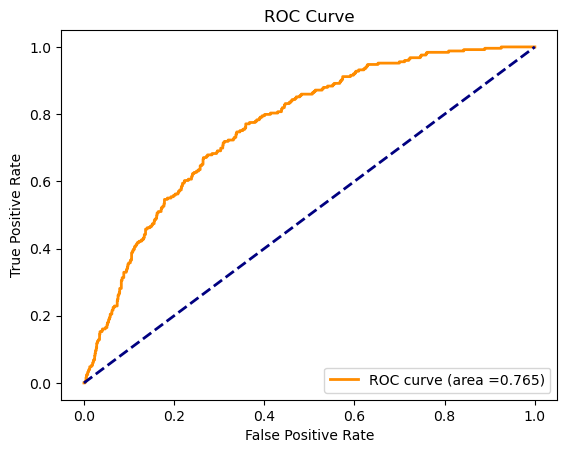

In [191]:
fprs, tprs, thresholds = roc_curve(y_true=y_test, y_score=predictive_probs_test)
auc = roc_auc_score(y_true=y_test, y_score=predictive_probs_test)
plot_roc(fprs, tprs, auc)

In [192]:
auc = roc_auc_score(y_true = y_test,y_score = X1_test['predictive_prob'])
auc

0.7653144453954251

In [193]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y,pred_prob,thresh):
    yhat = 1*(pred_prob>= thresh)
    tn,fp,fn,tp = confusion_matrix(y_true=y,y_pred = yhat).ravel()
    tpr = tp/(fn+tp)
    fpr = fp/(fp+tn)
    return pd.DataFrame({'threshold':[thresh],'fpr':[fpr],'tpr':[tpr]})

In [194]:
for thresh in np.arange(0,1.01,.001):
    print(fpr_tpr_thresh(y_test,X1_test['predictive_prob'],thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0      0.001  1.0  1.0
   threshold  fpr  tpr
0      0.002  1.0  1.0
   threshold       fpr  tpr
0      0.003  0.995446  1.0
   threshold       fpr  tpr
0      0.004  0.994536  1.0
   threshold       fpr  tpr
0      0.005  0.991803  1.0
   threshold      fpr  tpr
0      0.006  0.98816  1.0
   threshold       fpr  tpr
0      0.007  0.982696  1.0
   threshold       fpr  tpr
0      0.008  0.978142  1.0
   threshold       fpr  tpr
0      0.009  0.971767  1.0
   threshold       fpr  tpr
0       0.01  0.962659  1.0
   threshold       fpr  tpr
0      0.011  0.957195  1.0
   threshold      fpr  tpr
0      0.012  0.95173  1.0
   threshold       fpr  tpr
0      0.013  0.948998  1.0
   threshold       fpr  tpr
0      0.014  0.944444  1.0
   threshold      fpr  tpr
0      0.015  0.93898  1.0
   threshold       fpr  tpr
0      0.016  0.938069  1.0
   threshold       fpr  tpr
0      0.017  0.935337  1.0
   threshold       fpr  tpr


   threshold       fpr       tpr
0       0.17  0.307832  0.698795
   threshold     fpr       tpr
0      0.171  0.3051  0.698795
   threshold       fpr       tpr
0      0.172  0.301457  0.690763
   threshold       fpr       tpr
0      0.173  0.298725  0.690763
   threshold       fpr       tpr
0      0.174  0.296903  0.690763
   threshold       fpr       tpr
0      0.175  0.295993  0.690763
   threshold       fpr       tpr
0      0.176  0.291439  0.682731
   threshold       fpr       tpr
0      0.177  0.288707  0.682731
   threshold       fpr       tpr
0      0.178  0.285974  0.682731
   threshold       fpr       tpr
0      0.179  0.284153  0.678715
   threshold       fpr       tpr
0       0.18  0.283242  0.678715
   threshold       fpr       tpr
0      0.181  0.281421  0.678715
   threshold       fpr       tpr
0      0.182  0.279599  0.678715
   threshold       fpr       tpr
0      0.183  0.275046  0.678715
   threshold       fpr       tpr
0      0.184  0.274135  0.678715
   threshold  

   threshold      fpr       tpr
0       0.33  0.09745  0.349398
   threshold      fpr       tpr
0      0.331  0.09745  0.345382
   threshold       fpr       tpr
0      0.332  0.096539  0.345382
   threshold       fpr       tpr
0      0.333  0.096539  0.341365
   threshold       fpr       tpr
0      0.334  0.095628  0.337349
   threshold       fpr       tpr
0      0.335  0.094718  0.337349
   threshold       fpr       tpr
0      0.336  0.094718  0.333333
   threshold       fpr       tpr
0      0.337  0.093807  0.333333
   threshold       fpr       tpr
0      0.338  0.090164  0.329317
   threshold       fpr       tpr
0      0.339  0.089253  0.329317
   threshold       fpr       tpr
0       0.34  0.088342  0.329317
   threshold       fpr       tpr
0      0.341  0.088342  0.321285
   threshold       fpr       tpr
0      0.342  0.088342  0.321285
   threshold       fpr       tpr
0      0.343  0.087432  0.313253
   threshold       fpr       tpr
0      0.344  0.084699  0.313253
   threshold  

   threshold       fpr       tpr
0      0.487  0.030055  0.124498
   threshold       fpr       tpr
0      0.488  0.030055  0.120482
   threshold       fpr       tpr
0      0.489  0.030055  0.120482
   threshold       fpr       tpr
0       0.49  0.029144  0.120482
   threshold       fpr       tpr
0      0.491  0.029144  0.116466
   threshold       fpr       tpr
0      0.492  0.029144  0.116466
   threshold       fpr       tpr
0      0.493  0.028233  0.116466
   threshold       fpr       tpr
0      0.494  0.028233  0.116466
   threshold       fpr      tpr
0      0.495  0.028233  0.11245
   threshold       fpr      tpr
0      0.496  0.028233  0.11245
   threshold       fpr      tpr
0      0.497  0.028233  0.11245
   threshold       fpr      tpr
0      0.498  0.028233  0.11245
   threshold       fpr      tpr
0      0.499  0.028233  0.11245
   threshold       fpr       tpr
0        0.5  0.028233  0.108434
   threshold       fpr       tpr
0      0.501  0.028233  0.108434
   threshold       f

   threshold       fpr       tpr
0      0.669  0.006375  0.024096
   threshold       fpr       tpr
0       0.67  0.006375  0.024096
   threshold       fpr       tpr
0      0.671  0.006375  0.024096
   threshold       fpr       tpr
0      0.672  0.006375  0.024096
   threshold       fpr       tpr
0      0.673  0.006375  0.024096
   threshold       fpr       tpr
0      0.674  0.006375  0.024096
   threshold       fpr       tpr
0      0.675  0.006375  0.024096
   threshold       fpr       tpr
0      0.676  0.006375  0.024096
   threshold       fpr       tpr
0      0.677  0.006375  0.024096
   threshold       fpr       tpr
0      0.678  0.006375  0.024096
   threshold       fpr       tpr
0      0.679  0.006375  0.024096
   threshold       fpr       tpr
0       0.68  0.006375  0.024096
   threshold       fpr       tpr
0      0.681  0.006375  0.024096
   threshold       fpr       tpr
0      0.682  0.006375  0.024096
   threshold       fpr       tpr
0      0.683  0.006375  0.024096
   thresho

   threshold  fpr  tpr
0       0.83  0.0  0.0
   threshold  fpr  tpr
0      0.831  0.0  0.0
   threshold  fpr  tpr
0      0.832  0.0  0.0
   threshold  fpr  tpr
0      0.833  0.0  0.0
   threshold  fpr  tpr
0      0.834  0.0  0.0
   threshold  fpr  tpr
0      0.835  0.0  0.0
   threshold  fpr  tpr
0      0.836  0.0  0.0
   threshold  fpr  tpr
0      0.837  0.0  0.0
   threshold  fpr  tpr
0      0.838  0.0  0.0
   threshold  fpr  tpr
0      0.839  0.0  0.0
   threshold  fpr  tpr
0       0.84  0.0  0.0
   threshold  fpr  tpr
0      0.841  0.0  0.0
   threshold  fpr  tpr
0      0.842  0.0  0.0
   threshold  fpr  tpr
0      0.843  0.0  0.0
   threshold  fpr  tpr
0      0.844  0.0  0.0
   threshold  fpr  tpr
0      0.845  0.0  0.0
   threshold  fpr  tpr
0      0.846  0.0  0.0
   threshold  fpr  tpr
0      0.847  0.0  0.0
   threshold  fpr  tpr
0      0.848  0.0  0.0
   threshold  fpr  tpr
0      0.849  0.0  0.0
   threshold  fpr  tpr
0       0.85  0.0  0.0
   threshold  fpr  tpr
0      0.85